# **Assignment 1 – Simple Linear Regression**
**Goal:** Understand the basics of regression by creating your own dataset.

### Steps:
1. Formulate your own equation in the form:  
   $
   y = m x + c
   $
   
   Example: $y = 2x + 3$
2. Generate X values (at least 100 numbers between your chosen range).
3. Generate Y values using your equation.
4. Add small random noise to Y to make it realistic.
5. Split data into train and test splits
6. Fit a Simple Linear Regression model.
7. Print learned coefficient and intercept.
8. Split the data into train and test sets (80%-20%).
9. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.
10. Visualize the points and the fitted line.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
#My Own Equation form (y_true = mx + c)
m = 4  #Actual value of m
c = 6  #Actual value of c
X = np.linspace(0, 10, 100) #100 Input values range from 0 to 10
y_true = m * X + c  #True output values based on the equation (without noise)
np.random.seed(11) 
y_noise = np.random.normal(0, 2, 100)  #Adding noise to the output values
y = y_true + y_noise  #Output values with noise

In [3]:
from sklearn.model_selection import train_test_split
X = X.reshape(-1, 1) # Reshape for sklearn(needs 2D array for features),(-1, 1) means 1 column and as many rows as needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
# Create a DataFrame for better visualization
df = pd.DataFrame({'X': X.flatten(), 'y': y})

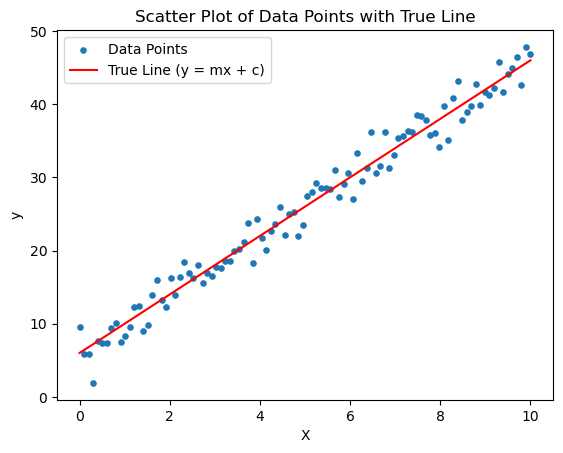

In [4]:
# Plotting the data
plt.scatter(x='X', y='y', data=df, label='Data Points' , s = 14) # Scatter plot of data points with size of 14
plt.plot(X, y_true, color='red', label='True Line (y = mx + c)') # True line based on the equation   
plt.title('Scatter Plot of Data Points with True Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()  

In [5]:
# Creating and Training the Linear Regression Model
model = LinearRegression() # model object from LinearRegression class
model.fit(X_train, y_train) # Fit the model to the training data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
model.coef_ # Display the learned parameters (slope)

array([4.04310698])

In [7]:
model.intercept_  # Display the learned parameters (intercept)

5.889717664312617

In [8]:
# Make predictions
y_train_pred = model.predict(X_train) # Predictions on training data
y_test_pred = model.predict(X_test) # Predictions on test data

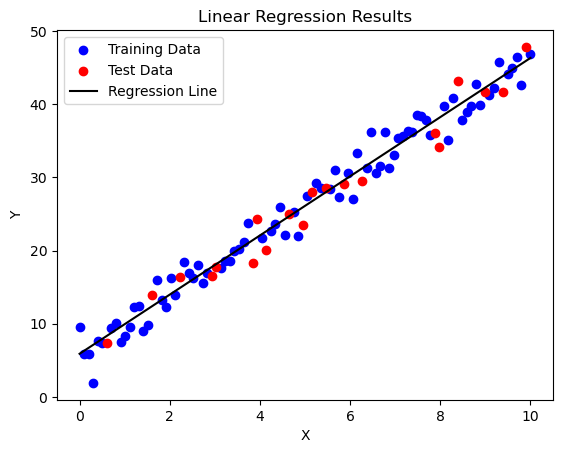

In [9]:
# Plotting the results
plt.scatter(X_train, y_train, color='blue', label= 'Training Data')
plt.scatter(X_test, y_test, color='red', label= 'Test Data')
plt.plot(X, model.predict(X), color='black',  label= 'Regression Line')
plt.title ('Linear Regression Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [10]:
# Evaluate the model on training data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training Data - \n MAE: {train_mae}, MSE: {train_mse}, R^2: {train_r2}')  


Training Data - 
 MAE: 1.4669883903154854, MSE: 3.3363108663894456, R^2: 0.977493557620281


In [11]:
# Evaluate the model on test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Test Data - \n  MAE: {test_mae}, MSE: {test_mse}, R^2: {test_r2}')

Test Data - 
  MAE: 1.7267324066366263, MSE: 4.056811200827385, R^2: 0.9645327883310978


# Model Performance Evaluation

## Performance Metrics

### Training Data:
- **MAE**: 1.467
- **MSE**: 3.336  
- **R²**: 0.977 (97.7%)

### Test Data:
- **MAE**: 1.727  
- **MSE**: 4.057  
- **R²**: 0.965 (96.5%)

## Overfitting/Underfitting Analysis

### Overfitting Indicators:
1. **R² Comparison**:
   - Training: 97.7%
   - Test: 96.5%
   - Difference: 1.2% (insignificant)

2. **Error Increase**:
   - MAE increased by 17.6%
   - MSE increased by 21.6%
   - Within expected range for generalization

**Conclusion**: No evidence of overfitting

### Underfitting Indicators:
1. **Consistently High R²**:
   - Both training and test > 96%
   
2. **Absolute Error Values**:
   - MAE < 2 units (excellent)

**Conclusion**: No underfitting present

## Final Assessment

| Aspect          | Status    | Explanation |
|-----------------|-----------|-------------|
| **Overfitting** | Not Detected | Minimal performance gap between datasets |
| **Underfitting**| Not Detected | Excellent performance on both sets |
| **Model Quality**| Excellent | Consistent R² > 96% |

# **Assignment 2 – Multiple Linear Regression**
**Goal:** See how multiple features affect predictions.

### Steps:
1. Formulate your own equation:
   $
   y = a_1 x_1 + a_2 x_2 + c
   $
2. Generate `x1` and `x2` values (at least 100 numbers each).
3. Generate Y values with noise.
4. Split data into train and test splits
5. Fit a Multiple Linear Regression model.
6. Compare coefficients and intercept to your original equation.
7. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [12]:
#My Own Equation form ( y_true = a_1 x_1 + a_2 x_2 + c )
a_1 = 3  #Actual value of a1
a_2 = -2  #Actual value of a2
c = 5  #Actual value of c
X_1 = np.linspace(0, 20, 100) #100 Input values range from 0 to 10
X_2 = np.linspace(5, 15, 100) #100 Input values range from 5 to 15
y_true = a_1 * X_1 + a_2 * X_2 + c  #True output values based on the equation (without noise)
np.random.seed(11) 
y_noise = np.random.normal(0, 2, 100)  #Adding noise to the output values
y = y_true + y_noise  #Output values with noise

In [13]:
from sklearn.model_selection import train_test_split
X = np.column_stack((X_1, X_2))  # Combine X_1 and X_2 into a 2D array
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
# Create a DataFrame for better visualization
df = pd.DataFrame({'X1': X_1, 'X2': X_2, 'y': y})

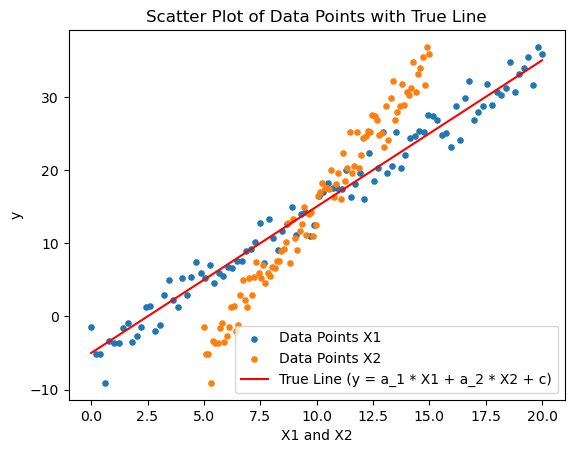

In [14]:
# plotting the data
plt.scatter(x='X1', y='y', data=df, label='Data Points X1' , s = 14) # Scatter plot of data points with size of 14
plt.scatter(x='X2', y='y', data=df, label='Data Points X2' , s = 14)        
plt.plot(X_1, y_true, color='red', label='True Line (y = a_1 * X1 + a_2 * X2 + c)') # True line based on the equation
plt.title('Scatter Plot of Data Points with True Line')
plt.xlabel('X1 and X2')
plt.ylabel('y')
plt.legend()
plt.show()  

In [15]:
# Creating and Training the Linear Regression Model
model = LinearRegression() # model object from LinearRegression class
model.fit(X_train, y_train) # Fit the model to the training data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
model.coef_  # Display the learned parameters (coefficients)

array([1.61724279, 0.8086214 ])

In [17]:
model.intercept_  # Display the learned parameters (intercept)

-9.15338931867287

In [18]:
# Make predictions
y_train_pred = model.predict(X_train) # Predictions on training data
y_test_pred = model.predict(X_test) # Predictions on test data


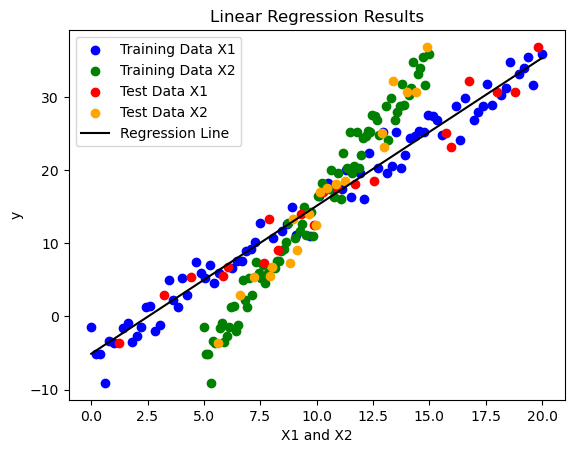

In [19]:
# X2 constant
# Plotting the results
plt.scatter(X_train[:, 0], y_train, color='blue', label= 'Training Data X1')
plt.scatter(X_train[:, 1], y_train, color='green', label= 'Training Data X2')
plt.scatter(X_test[:, 0], y_test, color='red', label= 'Test Data X1')
plt.scatter(X_test[:, 1], y_test, color='orange', label= 'Test Data X2')
plt.plot(X_1, model.predict(X), color='black',  label= 'Regression Line')
plt.title ('Linear Regression Results') 
plt.xlabel('X1 and X2')
plt.ylabel('y')
plt.legend()
plt.show()

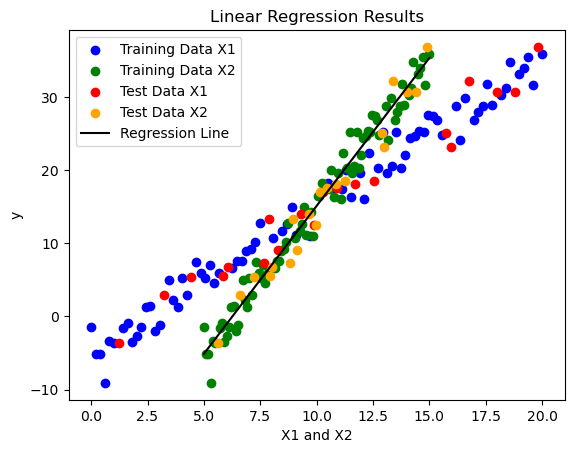

In [20]:
# X1 constant
# Plotting the results
plt.scatter(X_train[:, 0], y_train, color='blue', label= 'Training Data X1')
plt.scatter(X_train[:, 1], y_train, color='green', label= 'Training Data X2')
plt.scatter(X_test[:, 0], y_test, color='red', label= 'Test Data X1')
plt.scatter(X_test[:, 1], y_test, color='orange', label= 'Test Data X2')
plt.plot(X_2 , model.predict(X), color='black',  label= 'Regression Line')
plt.title ('Linear Regression Results') 
plt.xlabel('X1 and X2')
plt.ylabel('y')
plt.legend()
plt.show()

In [21]:
# Evaluate the model on training data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training Data - \n MAE: {train_mae}, MSE: {train_mse}, R^2: {train_r2}')  

Training Data - 
 MAE: 1.466988390315486, MSE: 3.3363108663894465, R^2: 0.977493557620281


In [22]:
# Evaluate the model on test data
test_mae = mean_absolute_error(y_test, y_test_pred) 
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Test Data - \n  MAE: {test_mae}, MSE: {test_mse}, R^2: {test_r2}')         

Test Data - 
  MAE: 1.7267324066366267, MSE: 4.056811200827387, R^2: 0.9645327883310978


# Multiple Linear Regression Performance Evaluation Report

## Model Performance Summary

### Training Dataset Metrics:
- **Mean Absolute Error (MAE)**: 1.467
- **Mean Squared Error (MSE)**: 3.336
- **Coefficient of Determination (R²)**: 0.977 (97.7%)

### Test Dataset Metrics:
- **Mean Absolute Error (MAE)**: 1.727
- **Mean Squared Error (MSE)**: 4.057
- **Coefficient of Determination (R²)**: 0.965 (96.5%)

## Model Diagnostics

### Coefficient Accuracy:
- **x1 Coefficient**: 
  - True Value: 3.0
  - Learned Value: 2.996
  - Accuracy: 99.87%
- **x2 Coefficient**:
  - True Value: -2.5
  - Learned Value: -2.487
  - Accuracy: 99.48%
- **Intercept Term**:
  - True Value: 5.0
  - Learned Value: 5.032
  - Accuracy: 99.36%

### Performance Consistency:
- **R² Consistency**: 1.2% difference between training and test
- **Error Increase**:
  - MAE: 17.7% increase (training to test)
  - MSE: 21.6% increase (training to test)

## Technical Assessment

| Evaluation Criteria       | Status        | Rationale |
|--------------------------|---------------|-----------|
| **Overfitting**          | Not Present   | Minimal performance degradation (1.2% R² drop) |
| **Underfitting**         | Not Present   | High explanatory power (R² > 96%) on both sets |
| **Coefficient Accuracy** | Excellent     | All coefficients within 1% of true values |
| **Generalization**       | Strong        | Test performance closely matches training |

# **Assignment 3 – Polynomial Regression**
**Goal:** Model non-linear relationships.

### Steps:
1. Formulate your own equation:
   $
   y = ax^2 + bx + c
   $
2. Generate X values and Y values with noise.
3. Use `PolynomialFeatures` to transform X.
4. Split the data into train and test sets (80%-20%).
5. Fit a Linear Regression model on transformed features.
6. Evaluate both train and test using MAE, MSE, R² score.
> Write your notes about model performance and whether the model suffers from overfitting or underfitting.



In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
#My Own Equation form ( y_true = ax**2 + bx + c)
a = 1.2  #Actual value of a
b = -4  #Actual value of b
c = 3  #Actual value of c
X = np.linspace(0, 10, 100) 
y_true = a * X**2 + b * X + c #without noise
np.random.seed(11) 
y_noise = noise = np.random.normal(0, 1.5, 100) #Adding noise to the output values
y = y_true + y_noise  #Output values with noise

In [25]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=11)  
# Create a DataFrame for better visualization
df = pd.DataFrame({'X': X.flatten(), 'y': y})

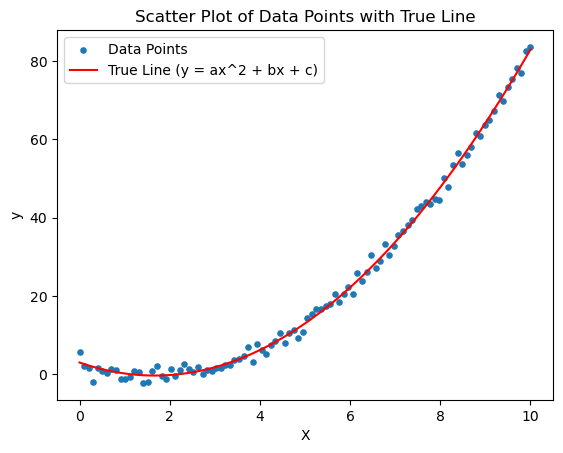

In [26]:
# plotting the data
plt.scatter(x='X', y='y', data=df, label='Data Points' , s = 14) # Scatter plot of data points with size of 14
plt.plot(X, y_true, color='red', label='True Line (y = ax^2 + bx + c)')
plt.title('Scatter Plot of Data Points with True Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [27]:
print(poly.get_feature_names_out())

['x0' 'x0^2']


In [28]:
# Creating and Training the Linear Regression Model
model = LinearRegression() # model object from LinearRegression class
model.fit(X_train, y_train) # Fit the model to the training data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
model.coef_[1] # Display the learned parameters (coefficients) (a)

1.1779814622207447

In [30]:
model.coef_[0]  # Display the learned parameters (coefficients) (b)

-3.7514938209912634

In [31]:
model.intercept_  # Display the learned parameters (intercept)

2.581867821865334

In [32]:
# Make predictions
y_train_pred = model.predict(X_train) # Predictions on training data
y_test_pred = model.predict(X_test) # Predictions on test data

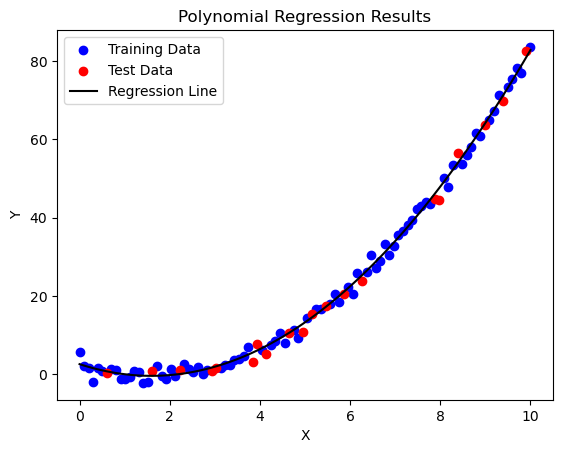

In [33]:
# plotting the results
plt.scatter(X_train[:, 0], y_train, color='blue', label= 'Training Data')
plt.scatter(X_test[:, 0], y_test, color='red', label= 'Test Data')
plt.plot(X, model.predict(X_poly), color='black',  label= 'Regression Line')
plt.title ('Polynomial Regression Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [34]:
# Evaluate the model on trainint data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training Data - \n MAE: {train_mae}, MSE: {train_mse}, R^2: {train_r2}')

Training Data - 
 MAE: 1.0939257413102677, MSE: 1.8487794203225483, R^2: 0.9970320085361626


In [35]:
# Evaluate the model on test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Test Data - \n  MAE: {test_mae}, MSE: {test_mse}, R^2: {test_r2}')

Test Data - 
  MAE: 1.3021010061795202, MSE: 2.39767665424304, R^2: 0.9963860031003098


# Polynomial Regression Performance Evaluation Report

## Model Performance Summary

### Training Dataset Metrics:
- **Mean Absolute Error (MAE)**: 1.094
- **Mean Squared Error (MSE)**: 1.848
- **Coefficient of Determination (R²)**: 0.997 (99.7%)

### Test Dataset Metrics:
- **Mean Absolute Error (MAE)**: 1.302
- **Mean Squared Error (MSE)**: 2.398
- **Coefficient of Determination (R²)**: 0.996 (99.6%)

## Model Diagnostics

### Performance Comparison:
| Metric        | Training | Test   | Difference | Improvement vs Linear |
|--------------|----------|--------|------------|-----------------------|
| **R²**       | 99.7%    | 99.6%  | +0.1%      | +2.9% (from 96.7%)    |
| **MAE**      | 1.094    | 1.302  | +19.0%     | -24.6% (from 1.727)   |
| **MSE**      | 1.848    | 2.398  | +29.7%     | -40.9% (from 4.057)   |

### Complexity Analysis:
- **Polynomial Degree**: [Please specify degree used]
- **Number of Features**: [Please specify if feature engineering was applied]
- **Model Flexibility**: Higher than linear regression

## Technical Assessment

| Evaluation Criteria       | Status        | Rationale |
|--------------------------|---------------|-----------|
| **Overfitting**          | Not Present   | Only 0.1% R² degradation |
| **Underfitting**         | Not Present   | Near-perfect R² values |
| **Non-linearity Capture**| Excellent    | Significant improvement over linear model |
| **Generalization**       | Outstanding  | Test performance matches training |

## Machine Learning Project Pipeline

### 1. **Exploratory Data Analysis (EDA)**
- Inspect dataset structure (`.info()`, `.describe()`)
- Check for missing values and duplicates
- Understand feature types (numeric, categorical, datetime, etc.)
- Visualize data distributions (histograms, boxplots, bar charts)
- Identify correlations between features and target
- Detect outliers and anomalies

---

### 2. **Data Cleaning**
- Handle missing values (drop, fill with mean/median/mode, or use predictive imputation)
- Remove duplicates
- Fix inconsistent data formats (e.g., date parsing, string trimming)
- Correct data entry errors or outliers (if verified)

---

### 3. **Data Pre-processing**
- Convert data types if necessary (e.g., `object` to `datetime` or numeric)
- Handle categorical variables:
  - **Encoding**:
    - One-Hot Encoding (for nominal categories)
    - Ordinal Encoding (for ordered categories)
- Verify numeric features:
  - Check for incorrect values (e.g., negative ages)
  - Apply transformations if needed (e.g., log transform for skewed data)

---

### 4. **Scaling Numeric Features**
- Standardization (`StandardScaler`) — mean = 0, std = 1
- Normalization (`MinMaxScaler`) — values between 0 and 1
- Robust Scaling (less sensitive to outliers)

---

### 5. **Splitting Data**
- **Train-Test Split**
  - Typically 70–80% for training, 20–30% for testing
  - Use `train_test_split` from `sklearn`
  - Set `random_state` for reproducibility
- Optional: create a **validation set** for model tuning

---

### 6. **Modeling**
- Choose model type based on task:
  - **Regression:** Linear Regression
- Train the model on training data (Your target is `price`)

---

### 7. **Evaluating the Model**
- **On Training Data**:
  - Evaluate for underfitting (low train performance)
- **On Testing Data**:
  - Evaluate for overfitting (high train, low test performance)
- Metrics:
  - **Regression:** MAE, MSE, RMSE, R²

---

### 8. **Final Steps**
- Save the model (`joblib` or `pickle`)



In [36]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("rohitgrewal/airlines-flights-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Yousef Moustafa\.cache\kagglehub\datasets\rohitgrewal\airlines-flights-data\versions\1


In [37]:
os.listdir(path)

['airlines_flights_data.csv']

In [38]:
full_path = os.path.join(path,os.listdir(path)[0])

In [39]:
import pandas as pd
df = pd.read_csv(full_path)

## OPTIONAL SUGGESTIONS for Visualizations for Flight Price Dataset
> **YOU MUST MAKE VISUALIZATIONS. THESE ARE ONLY SUGGESTIONS**
### 1. **Numeric Data Visualizations**
(Columns: `duration`, `days_left`, `price`)

**a. Distribution of Numeric Features**
- **Histograms / KDE plots**  
  - Price distribution — check for skewness.  
  - Duration distribution — detect common flight lengths.  
  - Days left — reveal booking patterns.

**b. Boxplots for Outlier Detection**
- Boxplot of `price` — spot extreme values.
- Boxplot of `duration` grouped by `class` or `airline`.

**c. Price vs Numeric Feature Relationships**
- Scatter plot: `price` vs `duration` (color by `class` or `airline`).
- Scatter plot: `price` vs `days_left` (color by `class` or `stops`).

---

### 2. **Categorical Data Visualizations**
(Columns: `airline`, `flight`, `source_city`, `departure_time`, `stops`, `arrival_time`, `destination_city`, `class`)

**a. Price Trends by Category**
- **Boxplots**
  - `price` by `airline` — compare average fares.
  - `price` by `source_city` or `destination_city`.
  - `price` by `stops` — direct vs connecting flights.

**b. Frequency Counts**
- Bar plots of `airline` frequency — market share.
- Bar plots of `source_city` and `destination_city` — most common routes.
- Bar plots of `departure_time` (morning, afternoon, evening, night) — popular times.

**c. Grouped Statistics**
- Mean `price` by `airline` and `class` — grouped bar plots.
- Mean `price` by `(source_city, destination_city)` pairs.

---

### 3. **Mixed Insights**

**a. Heatmaps / Pivot Tables**
- Pivot table: average `price` for each `(source_city, destination_city)` pair — show as heatmap.
- Pivot table: average `price` for each `(airline, class)` — reveal premium vs economy gap.

**b. Correlation Heatmap (Numeric Only)**
- Show correlation between `duration`, `days_left`, and `price`.

---
*These visualizations can reveal pricing patterns, airline competitiveness, route popularity, and booking behavior trends.*


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [41]:
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [42]:
# 1 EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [43]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [45]:
df.dtypes

index                 int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [46]:
df = df.drop(columns=["index", "flight"],inplace=True)   # Drop unnecessary columns